### Importamos todas las librerias a usar

In [2]:
import math
import scipy.stats as st
from IPython.display import display, Markdown, Latex
import pandas as pd
import matplotlib.pyplot as plt
import IPython.core.display as di
import numpy as np
import matplotlib.image as mpimg
from scipy.stats import f

## Correlacion, Residuos Aplicando Cuadro **ANOVA**

Se cuenta con información de una muestra de 10 fondos de inversión, respecto a su rentabilidad porcentual para un periodo de doce meses y el activo total (en millones de $). Los datos se presentan en la siguiente tabla. 

Pruebe, con un nivel de significancia de 5%, si existe la relación lineal entre el activo total y la rentabilidad (Anova).

![s8Ej1](../Images/S8EJ1.png)

**Paso 1.** Planteo de Hipótesis:

$H_0:\beta_1 = 0$ (No hay relación lineal entre X e Y)

$H_0:\beta_1 \neq 0$ (Si hay relación lineal entre X e Y)

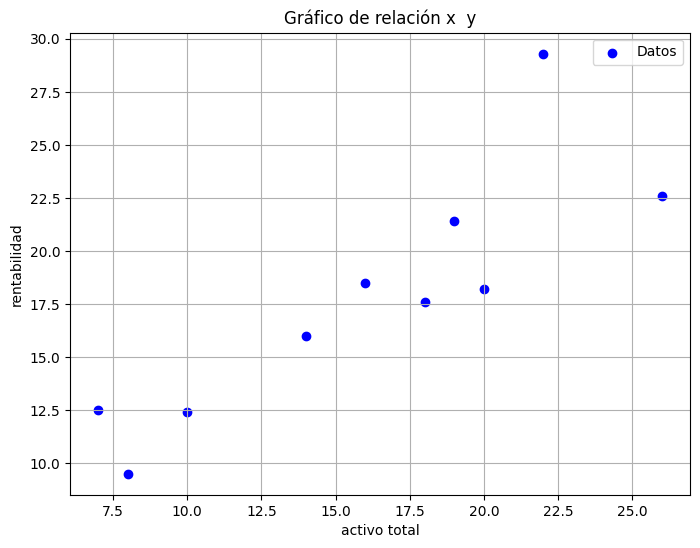

,X,Yi,Yi=B0+B1X,SCR,SCE
0,22,29.3,22.5844,22.8905,45.0993
1,18,17.6,19.3948,2.5434,3.2213
2,14,16.0,16.2052,2.5434,0.0421
3,8,9.5,11.4208,40.6942,3.6895
4,26,22.6,25.7740,63.5847,10.0743
5,10,12.4,13.0156,22.8905,0.3790
6,16,18.5,17.8000,0.0000,0.4900
7,19,21.4,20.1922,5.7226,1.4588
8,20,18.2,20.9896,10.1735,7.7819
9,7,12.5,10.6234,51.5036,3.5216


Media Yi= 17.8

SCT = 222.5464 + 75.7578  = 298.304


,GL,SC,CM,FC,FTAB
Regresion,1,222.5464,222.546400,23.5008,5.3177
Residual(Error),8,75.7578,9.469725,0.0000,0.0000
Total,9,298.3040,0.000000,0.0000,0.0000


Conlusión: Con un nivel de significancia del 5.0 % se rechaza la Hipotesis nula . Por lo tanto, se concluye que si 
existe relacion lineal entre activo total y rentabilidad


In [4]:
# Datos
#pregunta= "¿Cuánto en Promedio recibirá de propina un moso que se ha demorado en atender 3.5 minutos?"
#VariableX = 3.5
x = [22,18,14,8,26,10,16,19,20,7]
TextX = "activo total"
y = [29.3,17.6,16,9.5,22.6,12.4,18.5,21.4,18.2,12.5]
TextY = "rentabilidad"
a = 0.05
n = len(x)

#------------------------------------------------
# Creacion y muestra en pantalla del grafico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Datos')
# Personalizar el gráfico
plt.title('Gráfico de relación x  y')
plt.xlabel(TextX)
plt.ylabel(TextY)
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()
#-----------------------------------------------

# Calculo x*y | x^2 | y^2
xy=[]
x2=[]
y2=[]
for posC,numero in enumerate(x):
    valorXY = numero*y[posC]
    valorX2 = numero**2
    valorY2 = y[posC]**2
    xy.append(valorXY)
    x2.append(valorX2)
    y2.append(valorY2)

# CALCULO DE COEFICIENTES PRACTICO
# PASO 1.
NuB1 = (n*sum(xy))-(sum(x)*sum(y))
DeNB1 = (n*sum(x2))-(sum(x)**2)
B1 = round(NuB1/DeNB1,4)
#print("\nPASO 1\nB1 =",NuB1,"/",DeNB1," =",B1)

# PASO 2.
NuB0 = (sum(y)-B1*sum(x))
B0 = round(NuB0/n,4)
#print("\nPASO 2\nB0 =",NuB0,"/",n," =",B0)

# Calculamos Y=B0+B1X
yBoB1X = []
for posC,numero in enumerate(x):
    valor = round(B0+B1*numero,4)
    yBoB1X.append(valor)
promedioyBoB1X = sum(yBoB1X)/n

# Calculamos SCR
Scr = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-promedioyBoB1X)**2,4)
    Scr.append(valor)

# Calculamos SCE
Sce = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-y[posC])**2,4)
    Sce.append(valor)

# Crear un DataFrame 
Tabla1 = {
    'X': x+[sum(x)],
    'Yi': y+[sum(y)],
    'Yi=B0+B1X': yBoB1X+[sum(yBoB1X)],
    'SCR': Scr+[sum(Scr)],   
    'SCE': Sce+[sum(Sce)]  
}
df = pd.DataFrame(Tabla1)
df = df.rename(index={10:'TOTAL'})

# Mostrar el DataFrame
display(df)

# Calculamos SCT
Sct = round(sum(Scr)+sum(Sce),3)

print("Media Yi=",promedioyBoB1X)
print("\nSCT =",sum(Scr),"+",sum(Sce)," =",Sct)

# ------------------Cuadro ANOVA------------------------
ResidualEror = n-2
cmREror = sum(Sce)/ResidualEror
Fc = round((sum(Scr)/1)/(sum(Sce)/(n-2)),4)
Ft = round(f.ppf(1-a,1,n-2),4)

Anova = {
    'GL': [1,ResidualEror,n-1],
    'SC': [sum(Scr), sum(Sce),Sct],
    'CM': [sum(Scr), cmREror, 0],  
    'FC': [Fc, 0, 0],   
    'FTAB': [Ft, 0, 0]  
}
tablaAnova = pd.DataFrame(Anova, index=['Regresion', 'Residual(Error)', 'Total'])
# Mostrar el DataFrame
display(tablaAnova)

# Conclusion
conclusion=""
sn = ""
if Fc>Ft:
    conclusion="se rechaza la Hipotesis nula"
    sn="si"
else:
    conclusion="se acepta la Hipotesis nula"
    sn = "no"
    
print("Conlusión: Con un nivel de significancia del",a*100,"%",conclusion,". Por lo tanto, se concluye que",sn,"\nexiste relacion lineal entre",TextX,"y",TextY)



# Varianza residual:
Calcular la  con los datos del ejercicio anterior.

![s8Ej1](../Images/S8EJ1.png)

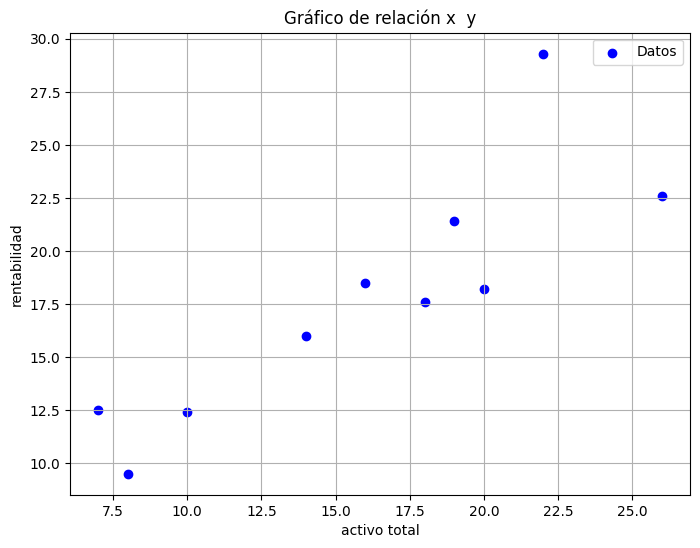

,X,Yi,Yi=B0+B1X,e_i
0,22,29.3,22.5844,6.7156
1,18,17.6,19.3948,-1.7948
2,14,16.0,16.2052,-0.2052
3,8,9.5,11.4208,-1.9208
4,26,22.6,25.7740,-3.1740
5,10,12.4,13.0156,-0.6156
6,16,18.5,17.8000,0.7000
7,19,21.4,20.1922,1.2078
8,20,18.2,20.9896,-2.7896
9,7,12.5,10.6234,1.8766


Ecuacion de Pronostico
Y = 5.0416 + 0.7974 X

Varianza Residual (S^2_r) = 75.7577 / 10 - 2 = 9.4697


In [5]:
# Datos
#pregunta= "¿Cuánto en Promedio recibirá de propina un moso que se ha demorado en atender 3.5 minutos?"
#VariableX = 3.5
x = [22,18,14,8,26,10,16,19,20,7]
TextX = "activo total"
y = [29.3,17.6,16,9.5,22.6,12.4,18.5,21.4,18.2,12.5]
TextY = "rentabilidad"
a = 0.05
n = len(x)

#------------------------------------------------
# Creacion y muestra en pantalla del grafico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Datos')
# Personalizar el gráfico
plt.title('Gráfico de relación x  y')
plt.xlabel(TextX)
plt.ylabel(TextY)
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()
#-----------------------------------------------

# Calculo x*y | x^2 | y^2
xy=[]
x2=[]
y2=[]
for posC,numero in enumerate(x):
    valorXY = numero*y[posC]
    valorX2 = numero**2
    valorY2 = y[posC]**2
    xy.append(valorXY)
    x2.append(valorX2)
    y2.append(valorY2)

# CALCULO DE COEFICIENTES PRACTICO
# PASO 1.
NuB1 = (n*sum(xy))-(sum(x)*sum(y))
DeNB1 = (n*sum(x2))-(sum(x)**2)
B1 = round(NuB1/DeNB1,4)
#print("\nPASO 1\nB1 =",NuB1,"/",DeNB1," =",B1)

# PASO 2.
NuB0 = (sum(y)-B1*sum(x))
B0 = round(NuB0/n,4)
#print("\nPASO 2\nB0 =",NuB0,"/",n," =",B0)

# Calculamos Y=B0+B1X
yBoB1X = []
for posC,numero in enumerate(x):
    valor = round(B0+B1*numero,4)
    yBoB1X.append(valor)
promedioyBoB1X = sum(yBoB1X)/n

# Calculamos ei
e_i=[]
sumaEi=0
sumaEi2=0
for posC,numero in enumerate(y):
    valor1 = numero - yBoB1X[posC]
    e_i.append(round(valor1,4))
    sumaEi += abs(valor1)
    sumaEi2 += abs(valor1)**2

# Calculo S_r^2
S2r = round(sumaEi2/(n-2),4)

# Crear un DataFrame
Tabla1 = {
    'X': x+[sum(x)],
    'Yi': y+[sum(y)],
    'Yi=B0+B1X': yBoB1X+[sum(yBoB1X)],
    'e_i': e_i+[sumaEi],   
}
df = pd.DataFrame(Tabla1)
df = df.rename(index={10:'TOTAL'})
# Mostrar el DataFrame
display(df)

print("Ecuacion de Pronostico\nY =",B0,"+",B1,"X")
print("\nVarianza Residual (S^2_r) =",round(sumaEi2,4),"/",n,"- 2 =",S2r)


# Coeficiente de Determinacion

![S8Ej3](../Images/S8Ej3.png)

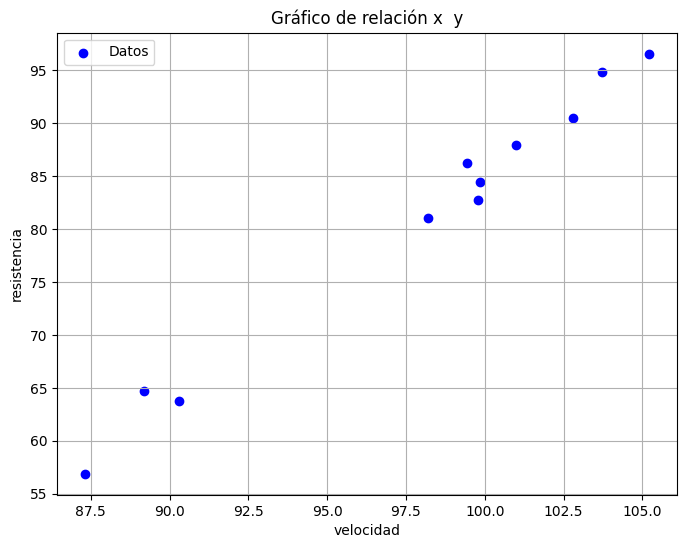

,X,Y,Y*X,X^2,Y^2
0,90.31,63.79,5760.8749,263.9898,0.1510
1,87.32,56.90,4968.5080,105.7887,0.4212
2,99.77,82.76,8256.9652,105.7887,11.2292
3,99.86,84.48,8436.1728,11.5007,60.1385
4,99.42,86.21,8570.9982,17.7320,14.8017
5,100.98,87.93,8879.1714,32.9342,0.1408
6,102.81,90.50,9304.3050,32.9342,6.8896
7,103.73,94.83,9836.7159,32.9342,28.8928
8,105.20,96.55,10157.0600,29.1993,0.9216
9,89.18,64.69,5769.0542,29.1993,16.3216



Coeficiente de Correlacion (r)


$$r =\frac{8887.84160000016}{\sqrt{4138.202199999476} \cdot \sqrt{19322.035600000294}}=0.994$$


PASO 1


$$\widehat{\beta}_{1}=\frac{n\sum XY-\sum X\sum Y}{n\sum X^{2}-(\sum X)^{2}}$$

$$\widehat{\beta}_{1}=\frac{966875.6009000002-957987.7593}{1163614.9063-1159476.7041000004}=2.1478$$


PASO 2


$$\widehat{\beta}_{0}=\frac{\sum Y-\widehat{\beta}_{1}\sum X}n$$

$$\widehat{\beta}_{0}=\frac{889.6699999999998-2312.7295620000004}11=-129.3691$$


Ecuacion de Pronostico
Y = -129.3691 + 2.1478 X


,Yi=B0+B1X,SCR,SCE
0,64.5987,265.0511,0.6540
1,58.1768,515.3940,1.6302
2,84.9169,16.3039,4.6522
3,85.1102,17.9023,0.3972
4,84.1652,10.7985,4.1812
5,87.5157,44.0446,0.1716
6,91.4462,111.6638,0.8953
7,93.4222,157.3296,1.9819
8,96.5795,246.5028,0.0009
9,62.1717,349.9665,6.3418



SCT = 1735.4294 + 21.1939  = 1756.6233

Coeficiente de Determinacion (R^2):
 1735.43 / 1756.62 = 0.9879 -> 98.79 %


In [2]:
# Datos
#pregunta= "¿Cuánto en Promedio recibirá de propina un moso que se ha demorado en atender 3.5 minutos?"
#VariableX = 3.5
x = [90.31,87.32,99.77,99.86,99.42,100.98,102.81,103.73,105.2,89.18,98.21]
TextX = "velocidad"
y = [63.79,56.9,82.76,84.48,86.21,87.93,90.5,94.83,96.55,64.69,81.03]
TextY = "resistencia"
n = len(x)

#------------------------------------------------
# Creacion y muestra en pantalla del grafico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Datos')
# Personalizar el gráfico
plt.title('Gráfico de relación x  y')
plt.xlabel(TextX)
plt.ylabel(TextY)
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()
#-----------------------------------------------

# Calculo x*y | x^2 | y^2
xy=[]
x2=[]
y2=[]
for posC,numero in enumerate(x):
    valorXY = numero*y[posC]
    valorX2 = numero**2
    valorY2 = y[posC]**2
    xy.append(valorXY)
    x2.append(valorX2)
    y2.append(valorY2)


#-----------Crear un DataFrame -------------
Tabla1 = {
    'X': x+[sum(x)],
    'Y': y+[sum(y)],
    'Y*X': xy+[sum(xy)],
    'X^2': Scr+[sum(x2)],   
    'Y^2': Sce+[sum(y2)]
}
df = pd.DataFrame(Tabla1)
df = df.rename(index={n:'TOTAL'})
# Mostrar el DataFrame
display(df)

# Calculo de coeficiente de Correlacion
print("\nCoeficiente de Correlacion (r)")
r = round((n * sum(xy) - sum(x) * sum(y)) / (math.sqrt(n * sum(x2) - (sum(x) ** 2)) * math.sqrt(n * sum(y2) - (sum(y) ** 2))),3)
display(di.Markdown(fr"$$r =\frac{{{n * sum(xy) - sum(x) * sum(y)}}}{{\sqrt{{{n * sum(x2) - (sum(x) ** 2)}}} \cdot \sqrt{{{n * sum(y2) - (sum(y) ** 2)}}}}}={r}$$"))

#-----------------------------------------------------------------
# Calculo de coeficiente de Determinacion -> Solo aplica para Regresion Lineal Simple
# CfD = round(r**2,4)
# print("Coeficiente de Determinacion Forma Simple =",CfD," ->",CfD*100,"%")
#----------------------------------------------------------
# Calculo de coeficiente de Determinacion -> Como debe de ser

# CALCULO DE COEFICIENTES PRACTICO
# PASO 1.
NuB1 = (n*sum(xy))-(sum(x)*sum(y))
DeNB1 = (n*sum(x2))-(sum(x)**2)
B1 = round(NuB1/DeNB1,4)
print("\nPASO 1")
display(di.Markdown("$$\widehat{\\beta}_{1}=\\frac{n\sum XY-\sum X\sum Y}{n\sum X^{2}-(\sum X)^{2}}$$"))
display(di.Markdown(fr"$$\widehat{{\beta}}_{{1}}=\frac{{{(n*sum(xy))}-{(sum(x)*sum(y))}}}{{{(n*sum(x2))}-{(sum(x)**2)}}}={B1}$$"))

# PASO 2.
NuB0 = (sum(y)-B1*sum(x))
B0 = round(NuB0/n,4)
print("\nPASO 2")
display(di.Markdown("$$\widehat{\\beta}_{0}=\\frac{\sum Y-\widehat{\\beta}_{1}\sum X}n$$"))
display(di.Markdown(fr"$$\widehat{{\beta}}_{{0}}=\frac{{{(sum(y))}-{B1*sum(x)}}}{n}={B0}$$"))

# Ecuacion de Pronostico:
print("\nEcuacion de Pronostico\nY =",B0,"+",B1,"X")

# Calculamos Y=B0+B1X
yBoB1X = []
for posC,numero in enumerate(x):
    valor = round(B0+B1*numero,4)
    yBoB1X.append(valor)
promedioyBoB1X = sum(y)/n

# Calculamos SCR
Scr = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-promedioyBoB1X)**2,4)
    Scr.append(valor)

# Calculamos SCE
Sce = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-y[posC])**2,4)
    Sce.append(valor)

# Crear un DataFrame 
Tabla2 = {
    'Yi=B0+B1X': yBoB1X+[sum(yBoB1X)],
    'SCR': Scr+[sum(Scr)],   
    'SCE': Sce+[sum(Sce)]  
}
tb2 = pd.DataFrame(Tabla2)
tb2 = tb2.rename(index={n:'TOTAL'})
# Mostrar el DataFrame
display(tb2)

# Calculamos SCT
Sct = round(sum(Scr)+sum(Sce),4)
print("\nSCT =",sum(Scr),"+",sum(Sce)," =",Sct)

# Calculamos R^2
r2 = sum(Scr)/Sct
print("\nCoeficiente de Determinacion (R^2):\n",round(sum(Scr),2),"/",round(Sct,2),"=",round(r2,4),"->",round(r2,4)*100,"%")



# Regresion Lineal Multiple
Se ha reunido la siguiente información de una muestra aleatoria de arrendadores de departamentos en una ciudad. Se intenta predecir la renta (en dólares por mes) con base en el tamaño del departamento (número de habitaciones) y la distancia al centro de la ciudad (en millas).

![S8Ej5](../Images/S8Ej5.png)

a) Determinar la ecuación de regresión estimada

b) Interpretar cada uno de los coeficientes

In [2]:
# Datos
y = [360,1000,450,525,350,300]
X1 = [2,6,3,4,2,1]
X2 = [1,1,2,3,10,4]
n = len(y)

# Calculo de Sumas X1/X2/Y/X1*Y/X2*Y/X1*X2/X1^2/X2^2
X1xY=[]
X2xY=[]
X1xX2=[]
X1_2 = []
X2_2 = []
for posC,numero in enumerate(y):
    valorX1xY = X1[posC]*numero
    valorX2xY = X2[posC]*numero
    valorX1xX2 = X1[posC]*X2[posC]
    valorX1_2 = X1[posC]**2
    valorX2_2 = X2[posC]**2
    X1xY.append(valorX1xY)
    X2xY.append(valorX2xY)
    X1xX2.append(valorX1xX2)
    X1_2.append(valorX1_2)
    X2_2.append(valorX2_2)

# Crear una Tabla 
Tabla1 = {
    'X1': X1+[sum(X1)],
    'X2': X2+[sum(X2)],   
    'Y': y+[sum(y)],
    'X1*Y': X1xY+[sum(X1xY)],
    'X2*Y': X2xY+[sum(X2xY)],
    'X1*X2': X1xX2+[sum(X1xX2)],
    'X1^2': X1_2+[sum(X1_2)],
    'X2^2': X2_2+[sum(X2_2)] 
}
tb1 = pd.DataFrame(Tabla1)
tb1 = tb1.rename(index={n:'SUMA'})
# Mostrar el DataFrame
display(tb1)

# Definir una matriz
matriz = np.array([[  n,     sum(X1),    sum(X2)],
                   [sum(X1),sum(X1_2),sum(X1xX2)],
                   [sum(X2),sum(X1xX2),sum(X2_2)]])

# Definir la segunda matriz (3x1)
matriz_3x1 = np.array([[sum( y )],
                       [sum(X1xY)],
                       [sum(X2xY)]])

# Calcular la inversa de la matriz
matriz_inversa = np.linalg.inv(matriz)

# Calcular el producto de matrices
producto = np.dot(matriz_inversa,matriz_3x1)

print("Matriz:")
print(matriz)
print("\nMatriz inversa:")
print(matriz_inversa)

print("\nMatriz 3x1:")
print(matriz_3x1)
print("\nProducto de matrices:")
print(producto)

print("\nEcuacion de Regresion Estimada\nY = ",producto[0][0],"+",producto[1][0],"+",producto[2][0])



,X1,X2,Y,X1*Y,X2*Y,X1*X2,X1^2,X2^2
0,2,1,360,720,360,2,4,1
1,6,1,1000,6000,1000,6,36,1
2,3,2,450,1350,900,6,9,4
3,4,3,525,2100,1575,12,16,9
4,2,10,350,700,3500,20,4,100
5,1,4,300,300,1200,4,1,16
SUMA,18,21,2985,11170,8535,50,70,131


Matriz:
[[  6  18  21]
 [ 18  70  50]
 [ 21  50 131]]

Matriz inversa:
[[ 1.48024856 -0.29027963 -0.126498  ]
 [-0.29027963  0.07656458  0.01731025]
 [-0.126498    0.01731025  0.02130493]]

Matriz 3x1:
[[ 2985]
 [11170]
 [ 8535]]

Producto de matrices:
[[ 96.45805593]
 [136.48468708]
 [ -2.40346205]]

Ecuacion de Regresion Estimada
Y =  96.45805592543229 + 136.48468708388816 + -2.4034620505992166


Interpretacion:
* $\beta_0$: La renta esperada(promedio), cuando el tamaño del departamento y distancia al centro de la ciudad toman el valor de cero será de 96.481$
* $\beta_1$: Por cada incremento de una habitación, la renta esperada(promedio) incrementará en 136.485$ manteniendo constante la distancia al centro de ciudad.
* $\beta_2$: Por cada incremento de una unidad de distancia al centro de la ciudad,la renta esperada (promedio) disminuirá en -2,401$ manteniendo constante wl número de habitaciónes.

# Regresion Lineal multiple - Con Coefeiciente de Determinacion

Un Ingeniero Industrial desea comprobar si la resistencia a la tensión de una fibra se ve afectada por el tiempo de secado, la temperatura de secado y el porcentaje de algodón en la fibra. Para lo cual recoge la información de una muestra de 11 productos. En la siguiente tabla se muestran los datos:

![S8Ej5](../Images/S8Ejc6.png)

Determine el modelo de regresion estimado y halle el coeficiente de determinacion del modelo:

In [1]:
# Datos
a = 0.05 # -> General
y = [213,220,216,234,230,235,238,230,236,231,243]
X1 = [2,2.3,2.3,2.5,3,3.4,3.4,3.4,4,4,4.1]
X2 = [13,15,15,18,20,19,19,19,16,16,17]
n = len(y)

# Calculo de Sumas X1/X2/Y/X1*Y/X2*Y/X1*X2/X1^2/X2^2
X1xY=[]
X2xY=[]
X1xX2=[]
X1_2 = []
X2_2 = []
for posC,numero in enumerate(y):
    valorX1xY = X1[posC]*numero
    valorX2xY = X2[posC]*numero
    valorX1xX2 = X1[posC]*X2[posC]
    valorX1_2 = X1[posC]**2
    valorX2_2 = X2[posC]**2
    X1xY.append(valorX1xY)
    X2xY.append(valorX2xY)
    X1xX2.append(valorX1xX2)
    X1_2.append(valorX1_2)
    X2_2.append(valorX2_2)

# ---------Crear una Tabla------------ 
Tabla1 = {
    'X1': X1+[sum(X1)],
    'X2': X2+[sum(X2)],   
    'Y': y+[sum(y)],
    'X1*Y': X1xY+[sum(X1xY)],
    'X2*Y': X2xY+[sum(X2xY)],
    'X1*X2': X1xX2+[sum(X1xX2)],
    'X1^2': X1_2+[sum(X1_2)],
    'X2^2': X2_2+[sum(X2_2)] 
}
tb1 = pd.DataFrame(Tabla1)
tb1 = tb1.rename(index={n:'SUMA'})
# ---------Mostrar el DataFrame-----
display(tb1)

# Definir una matriz
matriz = np.array([[  n,     sum(X1),    sum(X2)],
                   [sum(X1),sum(X1_2),sum(X1xX2)],
                   [sum(X2),sum(X1xX2),sum(X2_2)]])

# Definir la segunda matriz (3x1)
matriz_3x1 = np.array([[sum( y )],
                       [sum(X1xY)],
                       [sum(X2xY)]])

# Calcular la inversa de la matriz
matriz_inversa = np.linalg.inv(matriz)

# Calcular el producto de matrices
producto = np.dot(matriz_inversa,matriz_3x1)

print("Matriz:")
print(matriz)
print("\nMatriz inversa:")
print(matriz_inversa)

print("\nMatriz 3x1:")
print(matriz_3x1)
print("\nProducto de matrices:")
print(producto)

# Asignando Variables
B0 = producto[0][0]
B1 = producto[1][0]
B2 = producto[2][0]
print("\nModelo de Regresion Estimado")
print("Y = ",B0,"+",B1,"X1 +",B2,"X2")

# Calculamos Y=B0+B1X
yBoB1X = []
for posC,numero in enumerate(X1):
    valor = round(B0+B1*numero+B2*X2[posC],4)
    yBoB1X.append(valor)
promedioyBoB1X = sum(y)/n

# Calculamos SCR
Scr = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-promedioyBoB1X)**2,4)
    Scr.append(valor)

# Calculamos SCE
Sce = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-y[posC])**2,4)
    Sce.append(valor)

# Crear un DataFrame 
Tabla2 = {
    'Yi=B0+B1X+B2X': yBoB1X+[sum(yBoB1X)],
    'SCR': Scr+[sum(Scr)],   
    'SCE': Sce+[sum(Sce)]  
}
tb2 = pd.DataFrame(Tabla2)
tb2 = tb2.rename(index={n:'TOTAL'})
# Mostrar el DataFrame
display(tb2)

# Calculamos SCT
Sct = round(sum(Scr)+sum(Sce),4)
print("\nSCT =",sum(Scr),"+",sum(Sce)," =",Sct)

# Calculamos R^2
r2 = sum(Scr)/Sct
print("\nCoeficiente de Determinacion (r^2):\n",round(sum(Scr),2),"/",round(Sct,2),"=",round(r2,4),"->",round(r2,4)*100,"%")
print("El 81.1% de la variabilidad de la variable Resistencia es explicado por el modelo de regresión ajustado")


,X1,X2,Y,X1*Y,X2*Y,X1*X2,X1^2,X2^2
0,2.0,13,213,426.0,2769,26.0,4.00,169
1,2.3,15,220,506.0,3300,34.5,5.29,225
2,2.3,15,216,496.8,3240,34.5,5.29,225
3,2.5,18,234,585.0,4212,45.0,6.25,324
4,3.0,20,230,690.0,4600,60.0,9.00,400
5,3.4,19,235,799.0,4465,64.6,11.56,361
6,3.4,19,238,809.2,4522,64.6,11.56,361
7,3.4,19,230,782.0,4370,64.6,11.56,361
8,4.0,16,236,944.0,3776,64.0,16.00,256
9,4.0,16,231,924.0,3696,64.0,16.00,256


Matriz:
[[  11.     34.4   187.  ]
 [  34.4   113.32  591.5 ]
 [ 187.    591.5  3227.  ]]

Matriz inversa:
[[ 6.23013212 -0.1569414  -0.33226026]
 [-0.1569414   0.20804684 -0.02903987]
 [-0.33226026 -0.02903987  0.02488682]]

Matriz 3x1:
[[ 2526. ]
 [ 7958.3]
 [43081. ]]

Producto de matrices:
[[174.22260618]
 [  8.19850348]
 [  1.75145889]]

Modelo de Regresion Estimado
Y =  174.22260618072255 + 8.198503481238731 X1 + 1.75145888907727 X2


,Yi=B0+B1X+B2X,SCR,SCE
0,213.3886,263.9898,0.1510
1,219.3510,105.7887,0.4212
2,219.3510,105.7887,11.2292
3,226.2451,11.5007,60.1385
4,233.8473,17.7320,14.8017
5,235.3752,32.9342,0.1408
6,235.3752,32.9342,6.8896
7,235.3752,32.9342,28.8928
8,235.0400,29.1993,0.9216
9,235.0400,29.1993,16.3216



SCT = 725.6007000000001 + 168.9461  = 894.5468

Coeficiente de Determinacion (r^2):
 725.6 / 894.55 = 0.8111 -> 81.11 %
El 81.1% de la variabilidad de la variable Resistencia es explicado por el modelo de regresión ajustado


# Matriz Varianza Covarianza
El gerente de una empresa estudia las posibles relaciones entre beneficios anuales,gastos en publicidad anuales y horas extraordinanas anuales de los empleados. Para ello utiliza datos, de estas tres vanables, proporcionadas por algunas empresas del sector. Se presentan los datos a continuación:

![S8Ej6](../Images/S8Eje6.png)

Desarrollar la matriz de Varianza Covarianza


In [34]:
# Datos
a = 0.05 # -> General
y = [1.3,3.5,2.8,3,3.3,4,3.7]
X1 = [0.3,1.5,0.7,1.1,1.2,2,2]
X2 = [4,9,6,7.5,8,7,8]
n = len(y)

# Calculo de Sumas Y/X1/X2/Y^2/X1*Y/X2*Y/X1*X2/X1^2/X2^2
X1xY=[]
X2xY=[]
X1xX2=[]
X1_2 = []
X2_2 = []
Y_2 = []
for posC,numero in enumerate(y):
    valorX1xY = X1[posC]*numero
    valorX2xY = X2[posC]*numero
    valorX1xX2 = X1[posC]*X2[posC]
    valorX1_2 = X1[posC]**2
    valorX2_2 = X2[posC]**2
    X1xY.append(valorX1xY)
    X2xY.append(valorX2xY)
    X1xX2.append(valorX1xX2)
    X1_2.append(valorX1_2)
    X2_2.append(valorX2_2)
    Y_2.append(numero**2)

# ---------Crear una Tabla------------ 
Tabla1 = {
    'Y': y+[sum(y)],
    'X1': X1+[sum(X1)],
    'X2': X2+[sum(X2)],
    'Y^2':Y_2+[sum(Y_2)],
    'X1*Y': X1xY+[sum(X1xY)],
    'X2*Y': X2xY+[sum(X2xY)],
    'X1*X2': X1xX2+[sum(X1xX2)],
    'X1^2': X1_2+[sum(X1_2)],
    'X2^2': X2_2+[sum(X2_2)] 
}
tb1 = pd.DataFrame(Tabla1)
tb1 = tb1.rename(index={n:'SUMA',n+1:'PROMEDIO'})
# ---------Mostrar el DataFrame-----
display(tb1)

print("\nUsando las Formulas")
display(di.Markdown("$$\sigma_y^2=\\frac{\sum_{i=1}^NY_i}N-\\bar{Y}^2$$"))
display(di.Markdown("$$S_{YX_1}=\\frac{\sum_{i=1}^NY_iX_{1i}}{N}-\\bar{Y}\\bar{X}_{1i}$$"))

# Calculamos las varibales que tienen el modelo de regresion Multiple
Oy_2 = (sum(Y_2)/n)-(sum(y)/n)**2
Ox1_2 = (sum(X1_2)/n)-(sum(X1)/n)**2
Ox2_2 = (sum(X2_2)/n)-(sum(X2)/n)**2
Syx1 = (sum(X1xY)/n)-((sum(y)/n)*sum(X1)/n)
Syx2 = (sum(X2xY)/n)-((sum(y)/n)*sum(X2)/n)
Sx2x1 = (sum(X1xX2)/n)-((sum(X1)/n)*sum(X2)/n)

print("Oy^2=",Oy_2,"\nOx1^2=",Ox1_2,"\nOx2^2=",Ox2_2,"\nSyx1=",Syx1,"\nSyx2=",Syx2,"\nSx2x1=",Sx2x1)

# Definir una matriz
matriz = np.array([[ Oy_2, Syx1,Syx2],
                   [Syx1,Ox1_2,Sx2x1],
                   [Syx2,Sx2x1,Ox2_2]])
print("\nMatriz:")
print(matriz)

,Y,X1,X2,Y^2,X1*Y,X2*Y,X1*X2,X1^2,X2^2
0,1.3,0.3,4.0,1.69,0.39,5.2,1.20,0.09,16.00
1,3.5,1.5,9.0,12.25,5.25,31.5,13.50,2.25,81.00
2,2.8,0.7,6.0,7.84,1.96,16.8,4.20,0.49,36.00
3,3.0,1.1,7.5,9.00,3.30,22.5,8.25,1.21,56.25
4,3.3,1.2,8.0,10.89,3.96,26.4,9.60,1.44,64.00
5,4.0,2.0,7.0,16.00,8.00,28.0,14.00,4.00,49.00
6,3.7,2.0,8.0,13.69,7.40,29.6,16.00,4.00,64.00
SUMA,21.6,8.8,49.5,71.36,30.26,160.0,66.75,13.48,366.25



Usando las Formulas


$$\sigma_y^2=\frac{\sum_{i=1}^NY_i}N-\bar{Y}^2$$

$$S_{YX_1}=\frac{\sum_{i=1}^NY_iX_{1i}}{N}-\bar{Y}\bar{X}_{1i}$$

Oy^2= 0.6726530612244908 
Ox1^2= 0.34530612244897907 
Ox2^2= 2.316326530612244 
Syx1= 0.4436734693877553 
Syx2= 1.036734693877552 
Sx2x1= 0.6459183673469386

Matriz:
[[0.67265306 0.44367347 1.03673469]
 [0.44367347 0.34530612 0.64591837]
 [1.03673469 0.64591837 2.31632653]]


# Taller N°4
En seis tiendas de una empresa que se especializa en un solo producto se tiene los siguientes datos recolectados en una semana; la ganancia (Y) en miles de dólares, cantidad de vendedores (X1) y precio del producto (X2) en dólares:

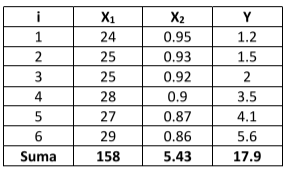

Hallar el modelo de regresion lineal múltiple estimado e interpretar los coeficientes de regresion.

,X1,X2,Y,X1*Y,X2*Y,X1*X2,X1^2,X2^2
0,24,0.95,1.2,28.8,1.140,22.80,576,0.9025
1,25,0.93,1.5,37.5,1.395,23.25,625,0.8649
2,25,0.92,2.0,50.0,1.840,23.00,625,0.8464
3,28,0.90,3.5,98.0,3.150,25.20,784,0.8100
4,27,0.87,4.1,110.7,3.567,23.49,729,0.7569
5,29,0.86,5.6,162.4,4.816,24.94,841,0.7396
SUMA,158,5.43,17.9,487.4,15.908,142.68,4180,4.9203


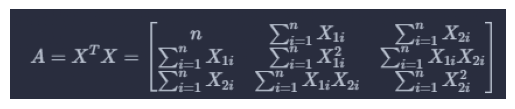

Matriz:
[[   6.      158.        5.43  ]
 [ 158.     4180.      142.68  ]
 [   5.43    142.68      4.9203]]

Matriz inversa:
[[ 1.52976316e+03 -1.94078947e+01 -1.12543860e+03]
 [-1.94078947e+01  2.69736842e-01  1.35964912e+01]
 [-1.12543860e+03  1.35964912e+01  8.47953216e+02]]

Matriz 3x1:
[[ 17.9  ]
 [487.4  ]
 [ 15.908]]

Producto de matrices:
[[ 19.8754386 ]
 [  0.36140351]
 [-29.18128655]]

Modelo de Regresion Estimado
Y =  19.875438596433014 + 0.3614035087725824 X1 + -29.181286549670403 X2


,Yi=B0+B1X+B2X,SCR,SCE
0,0.8269,4.6501,0.1392
1,1.7719,1.4675,0.0739
2,2.0637,0.8457,0.0041
3,3.7316,0.5599,0.0536
4,4.2456,1.5934,0.0212
5,5.2602,5.1842,0.1155
TOTAL,17.8999,14.3008,0.4075



SCT = 14.300799999999999 + 0.4075  = 14.7083

Coeficiente de Determinacion (r^2):
 14.3 / 14.71 = 0.9723 -> 97.23 %
El 81.1% de la variabilidad de la variable Resistencia es explicado por el modelo de regresión ajustado


In [3]:
# Datos
a = 0.05 # -> General
y = [1.2,1.5,2,3.5,4.1,5.6]
X1 = [24,25,25,28,27,29]
X2 = [0.95,0.93,0.92,0.9,0.87,0.86]
n = len(y)

# Calculo de Sumas X1/X2/Y/X1*Y/X2*Y/X1*X2/X1^2/X2^2
X1xY=[]
X2xY=[]
X1xX2=[]
X1_2 = []
X2_2 = []
for posC,numero in enumerate(y):
    valorX1xY = X1[posC]*numero
    valorX2xY = X2[posC]*numero
    valorX1xX2 = X1[posC]*X2[posC]
    valorX1_2 = X1[posC]**2
    valorX2_2 = X2[posC]**2
    X1xY.append(valorX1xY)
    X2xY.append(valorX2xY)
    X1xX2.append(valorX1xX2)
    X1_2.append(valorX1_2)
    X2_2.append(valorX2_2)

# ---------Crear una Tabla------------ 
Tabla1 = {
    'X1': X1+[sum(X1)],
    'X2': X2+[sum(X2)],   
    'Y': y+[sum(y)],
    'X1*Y': X1xY+[sum(X1xY)],
    'X2*Y': X2xY+[sum(X2xY)],
    'X1*X2': X1xX2+[sum(X1xX2)],
    'X1^2': X1_2+[sum(X1_2)],
    'X2^2': X2_2+[sum(X2_2)] 
}
tb1 = pd.DataFrame(Tabla1)
tb1 = tb1.rename(index={n:'SUMA'})
# ---------Mostrar el DataFrame-----
display(tb1)

# Cargar la imagen
imagen = mpimg.imread("../Images/matrizRegresionMultiple.png")
# Mostrar la imagen
plt.imshow(imagen)
plt.axis('off')  # Desactivar los ejes
plt.show()

# Definir una matriz
matriz = np.array([[  n,     sum(X1),    sum(X2)],
                   [sum(X1),sum(X1_2),sum(X1xX2)],
                   [sum(X2),sum(X1xX2),sum(X2_2)]])

# Definir la segunda matriz (3x1)
matriz_3x1 = np.array([[sum( y )],
                       [sum(X1xY)],
                       [sum(X2xY)]])

# Calcular la inversa de la matriz
matriz_inversa = np.linalg.inv(matriz)

# Calcular el producto de matrices
producto = np.dot(matriz_inversa,matriz_3x1)

print("Matriz:")
print(matriz)
print("\nMatriz inversa:")
print(matriz_inversa)

print("\nMatriz 3x1:")
print(matriz_3x1)
print("\nProducto de matrices:")
print(producto)

# Asignando Variables
B0 = producto[0][0]
B1 = producto[1][0]
B2 = producto[2][0]
print("\nModelo de Regresion Estimado")
print("Y = ",B0,"+",B1,"X1 +",B2,"X2")

# Calculamos Y=B0+B1X
yBoB1X = []
for posC,numero in enumerate(X1):
    valor = round(B0+B1*numero+B2*X2[posC],4)
    yBoB1X.append(valor)
promedioyBoB1X = sum(yBoB1X)/n

# Calculamos SCR
Scr = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-promedioyBoB1X)**2,4)
    Scr.append(valor)

# Calculamos SCE
Sce = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-y[posC])**2,4)
    Sce.append(valor)

# Crear un DataFrame 
Tabla2 = {
    'Yi=B0+B1X+B2X': yBoB1X+[sum(yBoB1X)],
    'SCR': Scr+[sum(Scr)],   
    'SCE': Sce+[sum(Sce)]  
}
tb2 = pd.DataFrame(Tabla2)
tb2 = tb2.rename(index={n:'TOTAL'})
# Mostrar el DataFrame
display(tb2)

# Calculamos SCT
Sct = round(sum(Scr)+sum(Sce),4)
print("\nSCT =",sum(Scr),"+",sum(Sce)," =",Sct)

# Calculamos R^2
r2 = sum(Scr)/Sct
print("\nCoeficiente de Determinacion (r^2):\n",round(sum(Scr),2),"/",round(Sct,2),"=",round(r2,4),"->",round(r2,4)*100,"%")
print("El 81.1% de la variabilidad de la variable Resistencia es explicado por el modelo de regresión ajustado")